###**Module 2: Assignment: Customize a Pre-trained Model for CV Classification**

Name:- Leena Doultani


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os

base_dir = '/content/images'

# Define subdirectories
categories = ['cats', 'dogs', 'snakes']

# List all files in each category
for category in categories:
    folder_path = os.path.join(base_dir, category)
    files = os.listdir(folder_path)
    print(f"Category: {category}, Number of files: {len(files)}")


Category: cats, Number of files: 1000
Category: dogs, Number of files: 1000
Category: snakes, Number of files: 1000


 # **Seperating 3 classes into train, test and validation directories, error handling of missing data**

In [ ]:
import shutil
import random

# Define paths
base_dir = '/content/images'
destination_dir = '/content/split_dataset'

# Define subdirectories
categories = ['cats', 'dogs', 'snakes']
split_ratios = (0.7, 0.2, 0.1)  # Train, Validation, Test

# Create split directories
for split in ['train', 'validation', 'test']:
    for category in categories:
        split_path = os.path.join(destination_dir, split, category)
        os.makedirs(split_path, exist_ok=True)

# Split data
for category in categories:
    folder_path = os.path.join(base_dir, category)
    files = os.listdir(folder_path)
    random.shuffle(files)  # Shuffle files to ensure randomness

    total_files = len(files)
    train_split = int(split_ratios[0] * total_files)
    validation_split = int(split_ratios[1] * total_files)

    train_files = files[:train_split]
    validation_files = files[train_split:train_split + validation_split]
    test_files = files[train_split + validation_split:]

    # Move files to respective directories
    for file_list, split in zip([train_files, validation_files, test_files], ['train', 'validation', 'test']):
        for file in file_list:
            src = os.path.join(folder_path, file)
            dst = os.path.join(destination_dir, split, category, file)
            shutil.copy(src, dst)

print("Dataset successfully split into train, validation, and test directories.")

Dataset successfully split into train, validation, and test directories.


####Verify Split Count

In [ ]:
def count_files_in_split(base_dir, split):
    print(f"--- {split.capitalize()} Data ---")
    for category in categories:
        path = os.path.join(base_dir, split, category)
        file_count = len(os.listdir(path))
        print(f"{category.capitalize()}: {file_count} images")

# Check dataset splits
for split in ['train', 'validation', 'test']:
    count_files_in_split(destination_dir, split)


--- Train Data ---
Cats: 700 images
Dogs: 700 images
Snakes: 700 images
--- Validation Data ---
Cats: 200 images
Dogs: 200 images
Snakes: 200 images
--- Test Data ---
Cats: 100 images
Dogs: 100 images
Snakes: 100 images


###Importing Necessary Libraries and Load Pretrained Pytorch Model VGG16



In [14]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, datasets, transforms
from torch.utils.data import DataLoader

# Check for GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load pretrained VGG16 model
vgg16 = models.vgg16(pretrained=True)

# Modify the final layer for 3 classes (cats, dogs, snakes)
vgg16.classifier[6] = nn.Linear(4096, 3)  # Output layer: 3 classes
vgg16 = vgg16.to(device)


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:05<00:00, 98.2MB/s]


Preparing the dataset with appropriate transforms for VGG16, including normalization.

In [15]:
# Define transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize for VGG16 input
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load datasets
train_dir = '/content/split_dataset/train'
validation_dir = '/content/split_dataset/validation'
test_dir = '/content/split_dataset/test'

train_dataset = datasets.ImageFolder(train_dir, transform=transform)
validation_dataset = datasets.ImageFolder(validation_dir, transform=transform)
test_dataset = datasets.ImageFolder(test_dir, transform=transform)

# Create data loaders
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
validation_loader = DataLoader(validation_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


Setting up the cross-entropy loss and optimizer for training.

In [16]:
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(vgg16.parameters(), lr=0.001)


###Train the VGG16 Model (Pytorch)

###Visualize Training & Validation Loss/Accuracy:


[Epoch 1/10] Train Loss: 0.6643 | Train Accuracy: 67.43% | Validation Loss: 0.6777 | Validation Accuracy: 67.67%
[Epoch 2/10] Train Loss: 0.6466 | Train Accuracy: 67.43% | Validation Loss: 0.6923 | Validation Accuracy: 65.83%
[Epoch 3/10] Train Loss: 0.6419 | Train Accuracy: 68.19% | Validation Loss: 0.6384 | Validation Accuracy: 68.50%
[Epoch 4/10] Train Loss: 0.6371 | Train Accuracy: 68.71% | Validation Loss: 0.9681 | Validation Accuracy: 54.83%
[Epoch 5/10] Train Loss: 0.7406 | Train Accuracy: 62.67% | Validation Loss: 0.6312 | Validation Accuracy: 68.33%
[Epoch 6/10] Train Loss: 0.6333 | Train Accuracy: 68.05% | Validation Loss: 0.6426 | Validation Accuracy: 66.50%
[Epoch 7/10] Train Loss: 0.6308 | Train Accuracy: 68.24% | Validation Loss: 0.6347 | Validation Accuracy: 66.83%
[Epoch 8/10] Train Loss: 0.6304 | Train Accuracy: 69.67% | Validation Loss: 0.6453 | Validation Accuracy: 70.00%
[Epoch 9/10] Train Loss: 0.5760 | Train Accuracy: 72.19% | Validation Loss: 0.6072 | Validation 

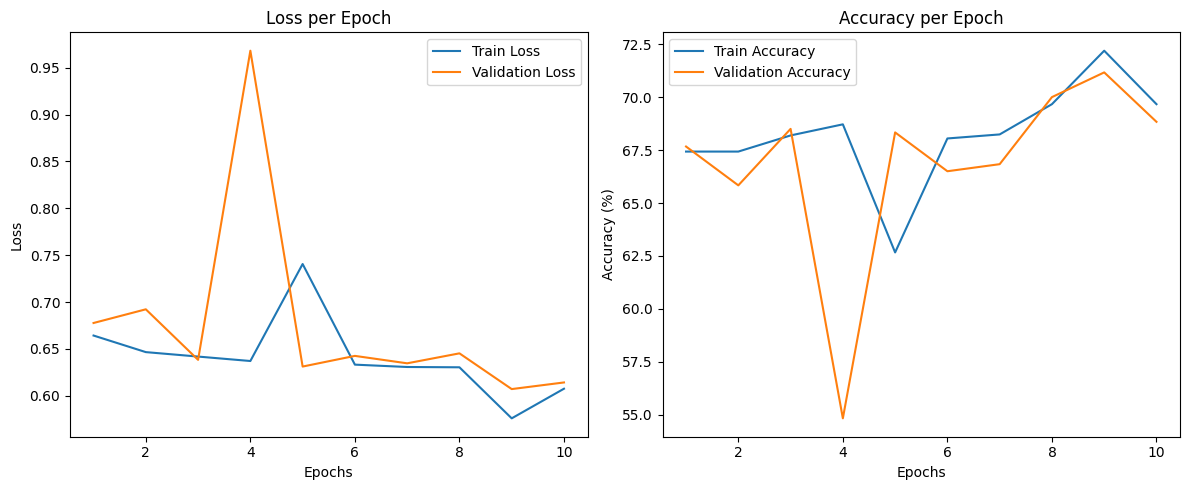

In [21]:
epochs = 10
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

for epoch in range(epochs):
    # Training
    vgg16.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()

        outputs = vgg16(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

    train_accuracy = 100 * correct / total
    train_losses.append(running_loss / len(train_loader))
    train_accuracies.append(train_accuracy)

    # Validation
    vgg16.eval()
    val_loss = 0.0
    val_correct = 0
    val_total = 0

    with torch.no_grad():
        for images, labels in validation_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = vgg16(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            _, preds = torch.max(outputs, 1)
            val_correct += (preds == labels).sum().item()
            val_total += labels.size(0)

    val_accuracy = 100 * val_correct / val_total
    val_losses.append(val_loss / len(validation_loader))
    val_accuracies.append(val_accuracy)

    print(f"[Epoch {epoch+1}/{epochs}] "
          f"Train Loss: {train_losses[-1]:.4f} | Train Accuracy: {train_accuracy:.2f}% | "
          f"Validation Loss: {val_losses[-1]:.4f} | Validation Accuracy: {val_accuracy:.2f}%")

# Visualize Losses and Accuracies
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, epochs+1), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss per Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, epochs+1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, epochs+1), val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy per Epoch')
plt.legend()

plt.tight_layout()
plt.show()


In [18]:
vgg16.eval()
test_correct = 0
test_total = 0
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = vgg16(images)
        _, preds = torch.max(outputs, 1)

        test_correct += (preds == labels).sum().item()
        test_total += labels.size(0)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

test_accuracy = 100 * test_correct / test_total
print(f"Test Accuracy: {test_accuracy:.2f}%")


Test Accuracy: 66.00%


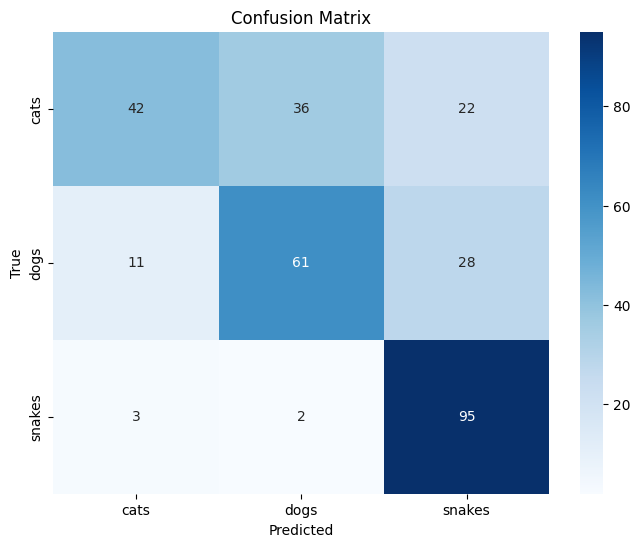

Classification Report:
              precision    recall  f1-score   support

        cats       0.75      0.42      0.54       100
        dogs       0.62      0.61      0.61       100
      snakes       0.66      0.95      0.78       100

    accuracy                           0.66       300
   macro avg       0.67      0.66      0.64       300
weighted avg       0.67      0.66      0.64       300



In [19]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Compute confusion matrix
conf_matrix = confusion_matrix(all_labels, all_preds)
class_names = train_dataset.classes

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification report
print("Classification Report:")
print(classification_report(all_labels, all_preds, target_names=class_names))
